In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping


In [16]:
#getting the training dataset
data_train = pd.read_csv("Google_Stock_Price_Train.csv")

#displaying few rows of the training dataset
print(f"Few rows of Training dataset:\n\n {data_train.head()}\n\n")

#getting the testing dataset
data_test = pd.read_csv("Google_Stock_Price_Test.csv")

#displaying few rows of the testing dataset
print(f"Few rows of Testing dataset:\n\n {data_test.head()}\n\n")

Few rows of Training dataset:

        Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800


Few rows of Testing dataset:

        Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400




In [17]:
# For scaling we have to make sure that dataset contains only numbers

print("Data types of the columns:\n")

#find the data types of different columns 
print(f"Data types of training dataset:\n{data_train.dtypes}")
print(f"Data types of training dataset:\n{data_test.dtypes}")

# The train dataset has columns Close and Volume as object.

#replacing ',' with '' and converting to float
data_train["Close"]=data_train["Close"].str.replace(',','')
data_train["Close"] = data_train["Close"].astype(float)

data_train["Volume"]=data_train["Volume"].str.replace(',','')
data_train["Volume"] = data_train["Volume"].astype(float)

#The test dataset has column Volume as object

#replacing ',' with '' and converting to float
data_test["Volume"]=data_test["Volume"].str.replace(',','')
data_test["Volume"] = data_test["Volume"].astype(float)

#checking again to see if all columns are numbers
print("\nChecking again the Data types of the columns:\n")
print(f"Data types of training dataset:\n{data_train.dtypes}")
print(f"Data types of training dataset:\n{data_test.dtypes}")


Data types of the columns:

Data types of training dataset:
Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object
Data types of training dataset:
Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

Checking again the Data types of the columns:

Data types of training dataset:
Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object
Data types of training dataset:
Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


In [21]:
# splitting train data as train and validation

#finding length of training dataset
length_data = len(data_train)  
#the splitting ratio
split_ratio = 0.7    
#length of splitted training dataset
length_train = round(length_data * split_ratio)   
#length of spliited validation dataset
length_validation = length_data - length_train

#displaying the lengths of the different datasets
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

#getting the training dataset
train_data = data_train[:length_train]
#converting the Date column to date time object
train_data['Date'] = pd.to_datetime(train_data['Date']) 
#displaying the training dataset
print(f"\nTrain data:\n{train_data}")

#getting the validation dataset
validation_data = data_train[length_train:]
#converting the Date column to date time object
validation_data['Date'] = pd.to_datetime(validation_data['Date']) 
#displaying the validation dataset
print(f"\nValidation data:\n{validation_data}")


#getting test dataset
test_data = data_test
#converting the Date column to date time object
test_data['Date'] = pd.to_datetime(test_data['Date'])
#displaying the test dataset
print(f"\nTest data:\n{test_data}")                                  

Data length : 1258
Train data length : 881
Validation data lenth : 377

Train data:
          Date    Open    High     Low   Close      Volume
0   2012-01-03  325.25  332.83  324.97  663.59   7380500.0
1   2012-01-04  331.27  333.87  329.08  666.45   5749400.0
2   2012-01-05  329.83  330.75  326.89  657.21   6590300.0
3   2012-01-06  328.34  328.77  323.68  648.24   5405900.0
4   2012-01-09  322.04  322.29  309.46  620.76  11688800.0
..         ...     ...     ...     ...     ...         ...
876 2015-06-29  525.01  528.61  520.54  521.52   1937800.0
877 2015-06-30  526.02  526.25  520.50  520.51   2217200.0
878 2015-07-01  524.73  525.69  518.23  521.84   1961000.0
879 2015-07-02  521.08  524.65  521.08  523.40   1235900.0
880 2015-07-06  519.50  525.25  519.00  522.86   1280500.0

[881 rows x 6 columns]

Validation data:
           Date    Open    High     Low   Close     Volume
881  2015-07-07  523.13  526.18  515.18  525.02  1597200.0
882  2015-07-08  521.05  522.73  516.11  516.83 

C:\Users\gomez\AppData\Local\Temp\ipykernel_24656\4170716957.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Date'] = pd.to_datetime(train_data['Date'])
C:\Users\gomez\AppData\Local\Temp\ipykernel_24656\4170716957.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['Date'] = pd.to_datetime(validation_data['Date'])


In [22]:
# specifying the features and target

#The features
features = ['Open','Close', 'High', 'Low', 'Volume']
#The target
target = 'Close'

#scaling

# minmax scaling
scaler = MinMaxScaler(feature_range = (0,1))

#scaling train features
train_features_scaled = scaler.fit_transform(train_data[features])
#scaling train target
train_target_scaled = scaler.fit_transform(train_data[[target]])

#scaling validation features
val_features_scaled = scaler.fit_transform(validation_data[features])
#scaling validation target
val_target_scaled = scaler.fit_transform(validation_data[[target]])

#scaling test features
test_features_scaled = scaler.fit_transform(test_data[features])
#scaling test target
test_target_scaled = scaler.fit_transform(test_data[[target]])

In [25]:
# Creating X_train and y_train from Train data

#number of previous days to consider for prediction.
#time_step = 2
time_step = 5

#list to store features for training
X_train = []
#list to store target for training
y_train = []

#looping to get the input and output
for i in range(time_step, length_train):
    X_train.append(train_features_scaled[i-time_step:i,0])
    y_train.append(train_target_scaled [i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

#displays the shape of X_train and y_train before reshaping
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

#displays the shape of X_train and y_train after reshaping
print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

# Creating X_val and y_val from val data

#list to store features for validation
X_val = []
#list to store target for validation
y_val = []

#looping to get the input and output
for i in range(time_step, length_validation):
    X_val.append(val_features_scaled[i-time_step:i,0])
    y_val.append(val_target_scaled [i,0])
    
# convert list to array
X_val, y_val = np.array(X_val), np.array(y_val)

#displays the shape of X_val and y_val before reshaping
print("Shape of X_val before reshape :",X_val.shape)
print("Shape of y_val before reshape :",y_val.shape)

#Reshaping
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
y_val = np.reshape(y_val, (y_val.shape[0],1))

#displays the shape of X_val and y_val after reshaping
print("Shape of X_val after reshape :",X_val.shape)
print("Shape of y_val after reshape :",y_val.shape)

# Creating X_test and y_test from test data

#list to store features for testing
X_test = []
#list to store target for testing
y_test = []

#looping to get the input and output
length_test = len(data_test)
for i in range(time_step, length_test):
    X_test.append(test_features_scaled[i-time_step:i,0])
    y_test.append(test_target_scaled[i,0])
    
# convert list to array
X_test, y_test = np.array(X_test), np.array(y_test)

#displays the shape of X_test and y_test before reshaping
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

#displays the shape of X_test and y_test after reshaping
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_train before reshape : (879, 2)
Shape of y_train before reshape : (879,)
Shape of X_train after reshape : (879, 2, 1)
Shape of y_train after reshape : (879, 1)
Shape of X_val before reshape : (375, 2)
Shape of y_val before reshape : (375,)
Shape of X_val after reshape : (375, 2, 1)
Shape of y_val after reshape : (375, 1)
Shape of X_test before reshape : (18, 2)
Shape of y_test before reshape : (18,)
Shape of X_test after reshape : (18, 2, 1)
Shape of y_test after reshape : (18, 1)


In [38]:
#Building the LSTM model

#creating a sequential model
model_lstm = Sequential()

#adding LSTM layer with 64 neurons and return_sequences=True
model_lstm.add(LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) 
#adding LSTM layer with 64 neurons and return_sequences=False
model_lstm.add(LSTM(64, return_sequences= False))
#adding fully connected layer with 32 neurons
model_lstm.add(Dense(32))
#adding output layer with one neuron
model_lstm.add(Dense(1))
#compiling the model
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
#fit the model with appropriate epochs and batch_size
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 4.5889e-04 - loss: 0.0852
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0017 - loss: 0.0695
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0016 - loss: 0.0681
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 2.0628e-04 - loss: 0.0708
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 5.9952e-04 - loss: 0.0703
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0538e-04 - loss: 0.0630
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 3.5094e-04 - loss: 0.0675
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 3.1715e-04 - loss: 0.0707
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 2.6829e-04 - loss: 0.0700
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 5.1545e-05 - loss: 0.0698


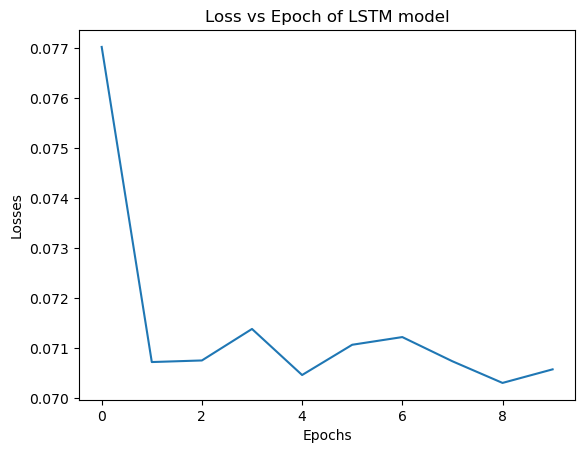

In [57]:
#plot of Loss Vs Epoch
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Loss vs Epoch of LSTM model")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


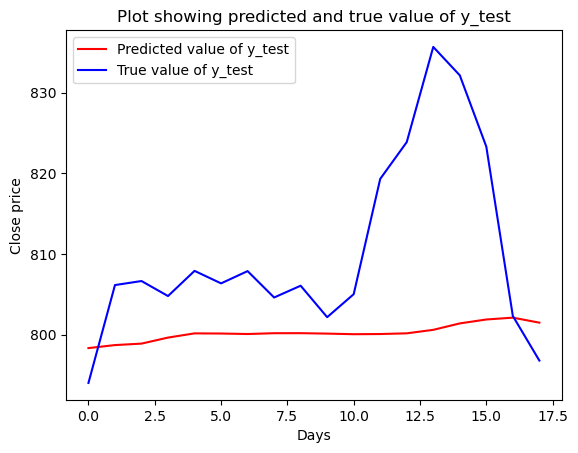

In [50]:
#Plot for predicted and true values of y_test 
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "Predicted value of y_test", c = "red" )
plt.plot(scaler.inverse_transform(y_test), label = "True value of y_test", color = "blue")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Plot showing predicted and true value of y_test")
plt.legend()
plt.show()

In [56]:
# hyper parameter optimization by changing the learning epochs to 25
history3 = model_lstm.fit(X_train, y_train, epochs = 25, batch_size = 10)

Epoch 1/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0021 - loss: 0.0704
Epoch 2/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 4.7793e-04 - loss: 0.0714
Epoch 3/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 2.5565e-05 - loss: 0.0733
Epoch 4/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 7.6030e-04 - loss: 0.0716
Epoch 5/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0034 - loss: 0.0710
Epoch 6/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0031 - loss: 0.0772
Epoch 7/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 4.2174e-04 - loss: 0.0724
Epoch 8/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 7.1197e-04 - loss: 0.0694
Epoch 9/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0021 - loss: 0.0668
Epoch 10/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 8.3693e-04 - loss: 0.0679
Epoch 11/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0023 - loss: 0.0680
Epoch 12/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

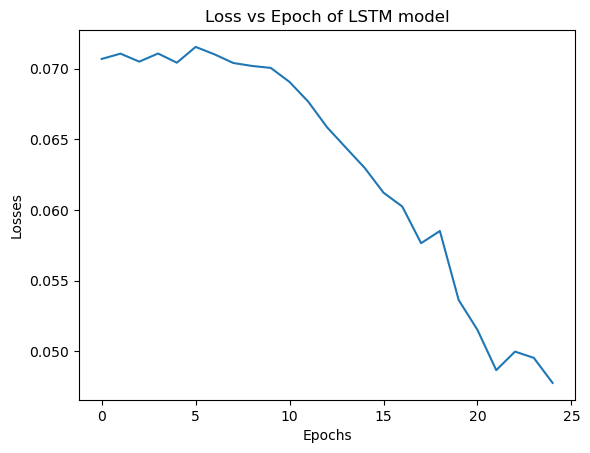

In [59]:
#plot of Loss Vs Epoch
plt.plot(history3.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Loss vs Epoch of LSTM model")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


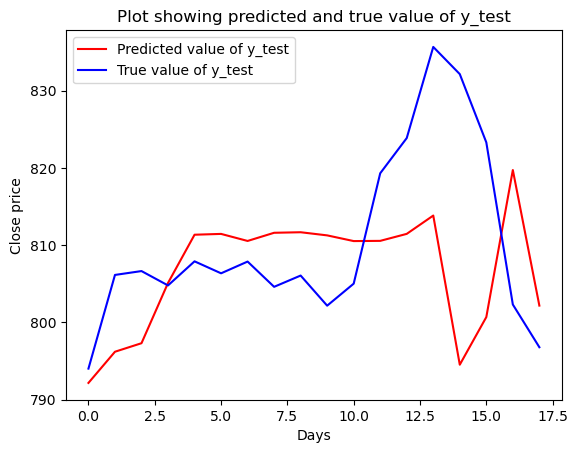

In [60]:
#Plot for predicted and true values of y_test 
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "Predicted value of y_test", c = "red" )
plt.plot(scaler.inverse_transform(y_test), label = "True value of y_test", color = "blue")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Plot showing predicted and true value of y_test")
plt.legend()
plt.show()

In [86]:
#Building the LSTM model

#creating a sequential model
model_lstm2 = Sequential()

#adding LSTM layer with 64 neurons and return_sequences=True
model_lstm2.add(LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) 
#adding LSTM layer with 64 neurons and return_sequences=False
model_lstm2.add(LSTM(64, return_sequences= False))
#adding fully connected layer with 32 neurons
model_lstm2.add(Dense(32))
#adding output layer with one neuron
model_lstm2.add(Dense(1))
#compiling the model
model_lstm2.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
#fit the model with appropriate epochs and batch_size
history4 = model_lstm2.fit(X_train, y_train, epochs = 10, batch_size = 5)

C:\Users\gomez\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 1.0679e-04 - loss: 0.0909
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0018 - loss: 0.0701
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 2.0925e-04 - loss: 0.0696
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0023 - loss: 0.0752
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 5.9867e-04 - loss: 0.0745
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 2.8858e-04 - loss: 0.0704
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0011 - loss: 0.0698
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0015 - loss: 0.0731
Epoch 9/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 5.2161e-05 - loss: 0.0749
Epoch 10/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0012 - loss: 0.0739


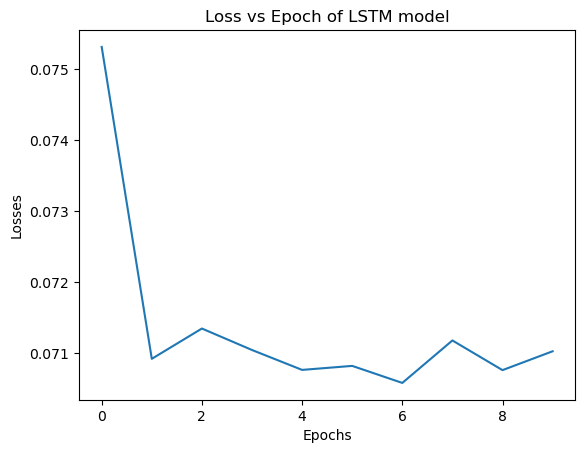

In [87]:
#plot of Loss Vs Epoch
plt.plot(history4.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Loss vs Epoch of LSTM model")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


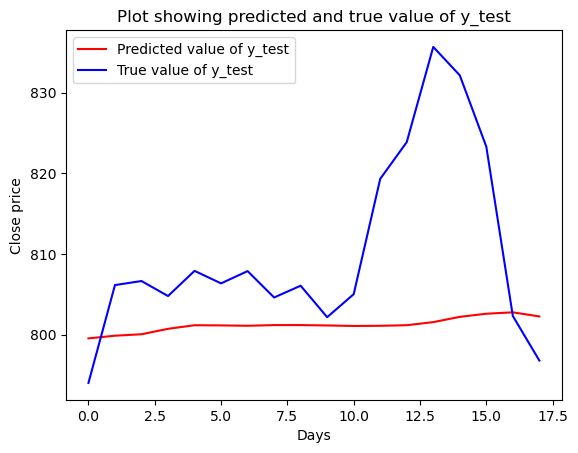

In [90]:
#Plot for predicted and true values of y_test 
plt.plot(scaler.inverse_transform(model_lstm2.predict(X_test)), label = "Predicted value of y_test", c = "red" )
plt.plot(scaler.inverse_transform(y_test), label = "True value of y_test", color = "blue")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Plot showing predicted and true value of y_test")
plt.legend()
plt.show()

In [91]:
history5 = model_lstm2.fit(X_train, y_train, epochs = 25, batch_size = 5)

Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0018 - loss: 0.0796
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0018 - loss: 0.0698
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0054 - loss: 0.0691
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0018 - loss: 0.0692
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 2.5618e-04 - loss: 0.0681
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 7.0044e-04 - loss: 0.0713
Epoch 7/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 2.4822e-04 - loss: 0.0707
Epoch 8/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0013 - loss: 0.0639
Epoch 9/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0032 - loss: 0.0651
Epoch 10/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 4.8559e-04 - loss: 0.0659
Epoch 11/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0030 - loss: 0.0611
Epoch 12/25
176/176 ━━━━━━━━━━━━━━━━

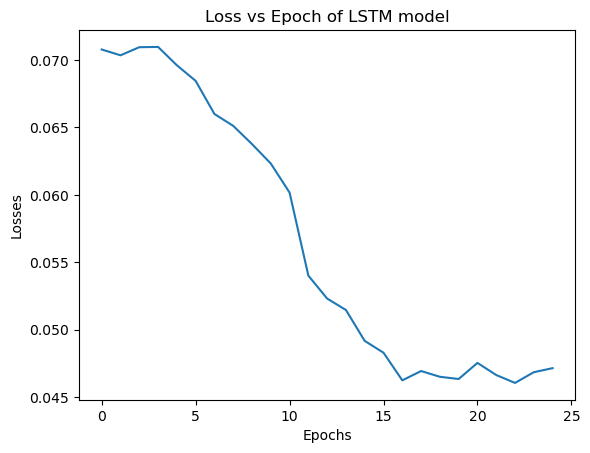

In [93]:
#plot of Loss Vs Epoch
plt.plot(history5.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Loss vs Epoch of LSTM model")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


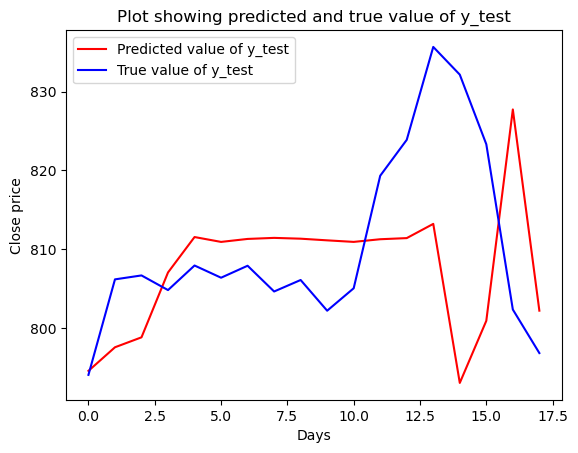

In [94]:
#Plot for predicted and true values of y_test 
plt.plot(scaler.inverse_transform(model_lstm2.predict(X_test)), label = "Predicted value of y_test", c = "red" )
plt.plot(scaler.inverse_transform(y_test), label = "True value of y_test", color = "blue")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Plot showing predicted and true value of y_test")
plt.legend()
plt.show()

In [139]:
# Creating X_train and y_train from Train data

#number of previous days to consider for prediction.
time_step = 2
#time_step = 5

#list to store features for training
X_train = []
#list to store target for training
y_train = []

#looping to get the input and output
for i in range(time_step, length_train):
    X_train.append(train_features_scaled[i-time_step:i,0])
    y_train.append(train_target_scaled [i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

#displays the shape of X_train and y_train before reshaping
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

#displays the shape of X_train and y_train after reshaping
print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

# Creating X_val and y_val from val data

#list to store features for validation
X_val = []
#list to store target for validation
y_val = []

#looping to get the input and output
for i in range(time_step, length_validation):
    X_val.append(val_features_scaled[i-time_step:i,0])
    y_val.append(val_target_scaled [i,0])
    
# convert list to array
X_val, y_val = np.array(X_val), np.array(y_val)

#displays the shape of X_val and y_val before reshaping
print("Shape of X_val before reshape :",X_val.shape)
print("Shape of y_val before reshape :",y_val.shape)

#Reshaping
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
y_val = np.reshape(y_val, (y_val.shape[0],1))

#displays the shape of X_val and y_val after reshaping
print("Shape of X_val after reshape :",X_val.shape)
print("Shape of y_val after reshape :",y_val.shape)

# Creating X_test and y_test from test data

#list to store features for testing
X_test = []
#list to store target for testing
y_test = []

#looping to get the input and output
length_test = len(data_test)
for i in range(time_step, length_test):
    X_test.append(test_features_scaled[i-time_step:i,0])
    y_test.append(test_target_scaled[i,0])
    
# convert list to array
X_test, y_test = np.array(X_test), np.array(y_test)

#displays the shape of X_test and y_test before reshaping
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

#displays the shape of X_test and y_test after reshaping
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_train before reshape : (879, 2)
Shape of y_train before reshape : (879,)
Shape of X_train after reshape : (879, 2, 1)
Shape of y_train after reshape : (879, 1)
Shape of X_val before reshape : (375, 2)
Shape of y_val before reshape : (375,)
Shape of X_val after reshape : (375, 2, 1)
Shape of y_val after reshape : (375, 1)
Shape of X_test before reshape : (18, 2)
Shape of y_test before reshape : (18,)
Shape of X_test after reshape : (18, 2, 1)
Shape of y_test after reshape : (18, 1)


In [148]:
#Building the LSTM model

#creating a sequential model
model_lstm3 = Sequential()

#adding LSTM layer with 64 neurons and return_sequences=True
model_lstm3.add(LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) 
#adding LSTM layer with 64 neurons and return_sequences=False
model_lstm3.add(LSTM(64, return_sequences= False))
#adding fully connected layer with 32 neurons
model_lstm3.add(Dense(32))
#adding output layer with one neuron
model_lstm3.add(Dense(1))
#compiling the model
model_lstm3.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
#fit the model with appropriate epochs and batch_size
history6 = model_lstm3.fit(X_train, y_train, epochs = 10, batch_size = 5)

Epoch 1/10


C:\Users\gomez\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 2.0162e-04 - loss: 0.0763
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 2.6419e-04 - loss: 0.0703
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0013 - loss: 0.0728
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 9.0763e-04 - loss: 0.0721
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0018 - loss: 0.0743
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0679e-04 - loss: 0.0699
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0022 - loss: 0.0734
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 5.1532e-04 - loss: 0.0676
Epoch 9/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 3.5631e-04 - loss: 0.0666
Epoch 10/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 3.4762e-04 - loss: 0.0730


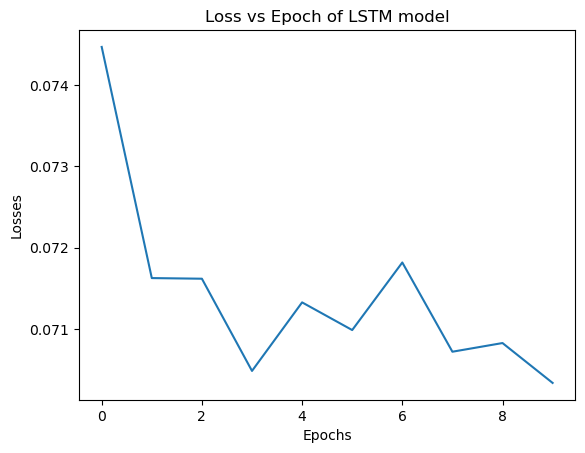

In [149]:
#plot of Loss Vs Epoch
plt.plot(history6.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Loss vs Epoch of LSTM model")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


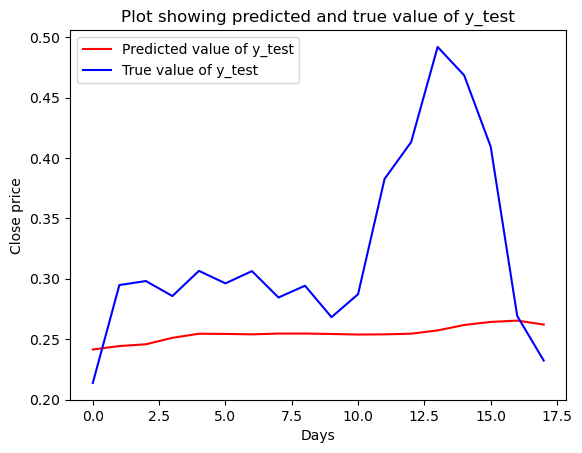

In [150]:
#Plot for predicted and true values of y_test 
plt.plot(scaler.inverse_transform(model_lstm3.predict(X_test)), label = "Predicted value of y_test", c = "red" )
plt.plot(scaler.inverse_transform(y_test), label = "True value of y_test", color = "blue")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Plot showing predicted and true value of y_test")
plt.legend()
plt.show()

In [151]:
history7 = model_lstm3.fit(X_train, y_train, epochs = 25, batch_size = 5)

Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0048 - loss: 0.0703
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0042 - loss: 0.0700
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 7.6120e-04 - loss: 0.0689
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 6.5573e-05 - loss: 0.0691
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0032 - loss: 0.0604
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0014 - loss: 0.0700
Epoch 7/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0029 - loss: 0.0625
Epoch 8/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 3.8279e-04 - loss: 0.0523
Epoch 9/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 6.9856e-04 - loss: 0.0506
Epoch 10/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0016 - loss: 0.0539
Epoch 11/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0016 - loss: 0.0434
Epoch 12/25
176/176 ━━━━━━━━━━━━━━━━

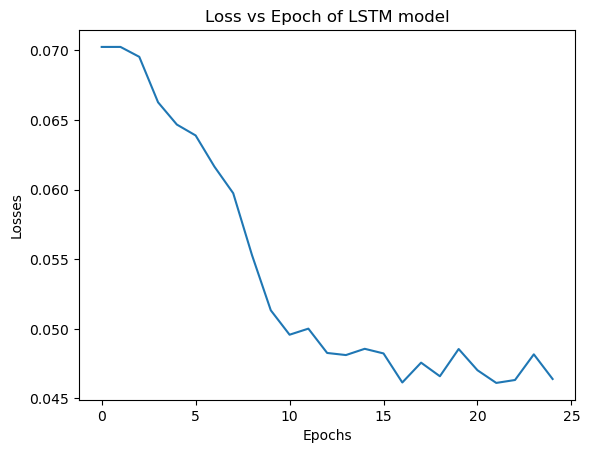

In [152]:
#plot of Loss Vs Epoch
plt.plot(history7.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Loss vs Epoch of LSTM model")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


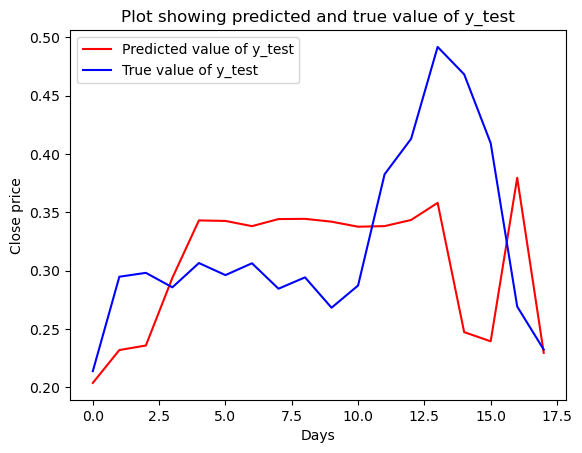

In [153]:
#Plot for predicted and true values of y_test 
plt.plot(scaler.inverse_transform(model_lstm3.predict(X_test)), label = "Predicted value of y_test", c = "red" )
plt.plot(scaler.inverse_transform(y_test), label = "True value of y_test", color = "blue")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Plot showing predicted and true value of y_test")
plt.legend()
plt.show()

In [155]:
# Take last sequence of test data for prediction
last_value = test_features_scaled[-1] 
print(last_value)

#taking the rows in test scaled features
X_input = test_features_scaled[-time_step]         
X_input = scaler.fit_transform(X_input.reshape(-1,1))      
X_input = np.reshape(X_input, (1,5,1))                    
print("Shape of X_input :", X_input.shape)

#prediction using LSTM
LSTM_prediction = scaler.inverse_transform(model_lstm2.predict(X_input))
print(LSTM_prediction)

[0.3059322  0.2150212  0.2220948  0.28744386 0.53336484]
Shape of X_input : (1, 5, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
[[0.53919065]]
